In [1]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os

Using drawing_utils to render the hand landmark model
<BR> Hands model:<img src=https://www.section.io/engineering-education/creating-a-hand-gesture-volume-controller-using-python-and-pycharm/hand.jpg>

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [3]:
def draw_hlandmarks(frame,results):
    for num,hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(frame,hand,mp_hands.HAND_CONNECTIONS) #rendering

Detection: Threshold for initial detecition to be successful
Tracking: Threshold for Tracking after Initial Detection

In [7]:
vidcap = cv2.VideoCapture(2)
with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence=0.5,max_num_hands=1) as hands:
    while vidcap.isOpened():
        ret,frame = vidcap.read()
        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)#OpenCV works in BlueGreenRed format but Mediapipe works in 
                                                     #RedGreenBlue format
        image.flags.writeable = False #setting flags to prevent copying the image
        results = hands.process(image) #detection
        image.flags.writeable = True #setting it back
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #changing back
        #print(results) #output all the landmarks 
        if results.multi_hand_landmarks:
            draw_hlandmarks(frame,results)
        cv2.imshow('Hand Tracking',frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    vidcap.release()
    cv2.destroyAllWindows()

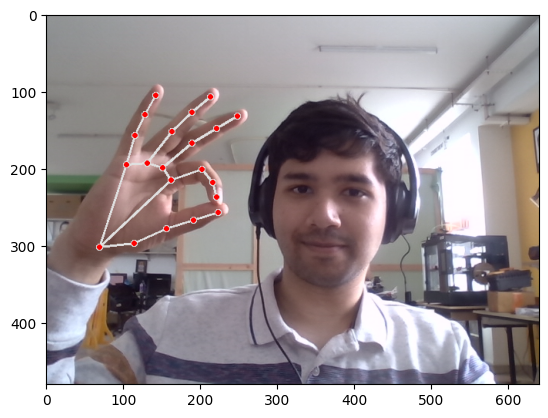

In [8]:
from matplotlib import pyplot as plt
draw_hlandmarks(frame,results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [4]:
# np.save(os.path.join(DATA_PATH,action,str(sequence),str(frame_num)))

NameError: name 'DATA_PATH' is not defined

In [4]:
def extract_keypoints(results):
    if results.multi_hand_landmarks:
        return np.array([[lmark.x,lmark.y,lmark.z] for lmark in results.multi_hand_landmarks[0].landmark]).flatten() \
        if results.multi_hand_landmarks[0].landmark else np.zeros((21*3))
    else:
        return np.zeros((21*3))

In [74]:
extract_keypoints(results)

array([ 6.52046263e-01,  8.90300989e-01,  8.25828124e-07,  7.01963603e-01,
        7.95042932e-01, -4.77825180e-02,  7.26872981e-01,  6.76577032e-01,
       -7.21933767e-02,  7.61001706e-01,  5.84097147e-01, -9.38969925e-02,
        8.00198674e-01,  5.21103442e-01, -1.15075730e-01,  6.10314369e-01,
        5.71535647e-01, -4.10715267e-02,  5.99927843e-01,  4.46854413e-01,
       -6.98211193e-02,  5.88695467e-01,  3.68507922e-01, -9.41163227e-02,
        5.76368749e-01,  3.01923394e-01, -1.13018475e-01,  5.55948555e-01,
        5.97701967e-01, -4.14479896e-02,  5.06534576e-01,  4.80637342e-01,
       -6.79058656e-02,  4.73480582e-01,  4.03207690e-01, -9.11062285e-02,
        4.45074141e-01,  3.40682745e-01, -1.08216457e-01,  5.20910919e-01,
        6.49215102e-01, -4.76897135e-02,  4.68146175e-01,  5.54119706e-01,
       -7.51972571e-02,  4.35947895e-01,  4.87029344e-01, -9.65597704e-02,
        4.08079684e-01,  4.26214993e-01, -1.10856727e-01,  5.00432014e-01,
        7.20142603e-01, -

In [75]:
pose = extract_keypoints(results)
len(pose)

63

In [ ]:
pose

In [5]:
DATA_PATH= os.path.join('Mediapipe_Data') #Path for exported data
actions = np.array(['Start','Go','Stop']) #Detect signs
no_sequences = 50 #number videos
sequences_length = 50 #number of frames

In [37]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [38]:
vidcap = cv2.VideoCapture(0)
vidcap.set(3,1600)
vidcap.set(4,1000)
with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence=0.5,max_num_hands=1) as hands:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequences_length):
                ret,frame = vidcap.read()
                image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)#OpenCV works in BlueGreenRed 
                                                             #format but Mediapipe works in RedGreenBlue format
                image.flags.writeable = False #setting flags to prevent copying the image
                results = hands.process(image) #detection
                image.flags.writeable = True #setting it back
                image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #changing back
                #print(results) #output all the landmarks 
                if results.multi_hand_landmarks:
                    draw_hlandmarks(image,results) #rendering the landmarks
                if frame_num ==  0:
                    cv2.putText(image,'Start',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting data for {} sequence number {}'.format(action,sequence),(30,20),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)
                    cv2.imshow('Hand Tracking',image)
                    cv2.waitKey(2000) #two second delay between the videos
                else:
                    cv2.putText(image,'Collecting data for {} sequence number {}'.format(action,sequence),(30,20),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)
                    cv2.imshow('Hand Tracking',image)
                
                
                keypoints = extract_keypoints(results)
                seqpath = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(seqpath, keypoints)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    vidcap.release()
    cv2.destroyAllWindows()

In [ ]:
vidcap.release()
cv2.destroyAllWindows()

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
labelmap = {label:num for num,label in enumerate(actions)}

NameError: name 'actions' is not defined

In [14]:
labelmap

{'Start': 0, 'Go': 1, 'Stop': 2}

In [15]:
actions

array(['Start', 'Go', 'Stop'], dtype='<U5')

In [8]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        windows = []
        for frame_num in range(sequences_length):
            print(os.path.join(DATA_PATH,action,str(sequence),'{}.npy'.format(frame_num)))
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),'{}.npy'.format(frame_num)))
            windows.append(res)
        sequences.append(windows)
        labels.append(labelmap[action])

Mediapipe_Data\Start\0\0.npy
Mediapipe_Data\Start\0\1.npy
Mediapipe_Data\Start\0\2.npy
Mediapipe_Data\Start\0\3.npy
Mediapipe_Data\Start\0\4.npy
Mediapipe_Data\Start\0\5.npy
Mediapipe_Data\Start\0\6.npy
Mediapipe_Data\Start\0\7.npy
Mediapipe_Data\Start\0\8.npy
Mediapipe_Data\Start\0\9.npy
Mediapipe_Data\Start\0\10.npy
Mediapipe_Data\Start\0\11.npy
Mediapipe_Data\Start\0\12.npy
Mediapipe_Data\Start\0\13.npy
Mediapipe_Data\Start\0\14.npy
Mediapipe_Data\Start\0\15.npy
Mediapipe_Data\Start\0\16.npy
Mediapipe_Data\Start\0\17.npy
Mediapipe_Data\Start\0\18.npy
Mediapipe_Data\Start\0\19.npy
Mediapipe_Data\Start\0\20.npy
Mediapipe_Data\Start\0\21.npy
Mediapipe_Data\Start\0\22.npy
Mediapipe_Data\Start\0\23.npy
Mediapipe_Data\Start\0\24.npy
Mediapipe_Data\Start\0\25.npy
Mediapipe_Data\Start\0\26.npy
Mediapipe_Data\Start\0\27.npy
Mediapipe_Data\Start\0\28.npy
Mediapipe_Data\Start\0\29.npy
Mediapipe_Data\Start\0\30.npy
Mediapipe_Data\Start\0\31.npy
Mediapipe_Data\Start\0\32.npy
Mediapipe_Data\Start

Mediapipe_Data\Start\7\11.npy
Mediapipe_Data\Start\7\12.npy
Mediapipe_Data\Start\7\13.npy
Mediapipe_Data\Start\7\14.npy
Mediapipe_Data\Start\7\15.npy
Mediapipe_Data\Start\7\16.npy
Mediapipe_Data\Start\7\17.npy
Mediapipe_Data\Start\7\18.npy
Mediapipe_Data\Start\7\19.npy
Mediapipe_Data\Start\7\20.npy
Mediapipe_Data\Start\7\21.npy
Mediapipe_Data\Start\7\22.npy
Mediapipe_Data\Start\7\23.npy
Mediapipe_Data\Start\7\24.npy
Mediapipe_Data\Start\7\25.npy
Mediapipe_Data\Start\7\26.npy
Mediapipe_Data\Start\7\27.npy
Mediapipe_Data\Start\7\28.npy
Mediapipe_Data\Start\7\29.npy
Mediapipe_Data\Start\7\30.npy
Mediapipe_Data\Start\7\31.npy
Mediapipe_Data\Start\7\32.npy
Mediapipe_Data\Start\7\33.npy
Mediapipe_Data\Start\7\34.npy
Mediapipe_Data\Start\7\35.npy
Mediapipe_Data\Start\7\36.npy
Mediapipe_Data\Start\7\37.npy
Mediapipe_Data\Start\7\38.npy
Mediapipe_Data\Start\7\39.npy
Mediapipe_Data\Start\7\40.npy
Mediapipe_Data\Start\7\41.npy
Mediapipe_Data\Start\7\42.npy
Mediapipe_Data\Start\7\43.npy
Mediapipe_

Mediapipe_Data\Start\15\42.npy
Mediapipe_Data\Start\15\43.npy
Mediapipe_Data\Start\15\44.npy
Mediapipe_Data\Start\15\45.npy
Mediapipe_Data\Start\15\46.npy
Mediapipe_Data\Start\15\47.npy
Mediapipe_Data\Start\15\48.npy
Mediapipe_Data\Start\15\49.npy
Mediapipe_Data\Start\16\0.npy
Mediapipe_Data\Start\16\1.npy
Mediapipe_Data\Start\16\2.npy
Mediapipe_Data\Start\16\3.npy
Mediapipe_Data\Start\16\4.npy
Mediapipe_Data\Start\16\5.npy
Mediapipe_Data\Start\16\6.npy
Mediapipe_Data\Start\16\7.npy
Mediapipe_Data\Start\16\8.npy
Mediapipe_Data\Start\16\9.npy
Mediapipe_Data\Start\16\10.npy
Mediapipe_Data\Start\16\11.npy
Mediapipe_Data\Start\16\12.npy
Mediapipe_Data\Start\16\13.npy
Mediapipe_Data\Start\16\14.npy
Mediapipe_Data\Start\16\15.npy
Mediapipe_Data\Start\16\16.npy
Mediapipe_Data\Start\16\17.npy
Mediapipe_Data\Start\16\18.npy
Mediapipe_Data\Start\16\19.npy
Mediapipe_Data\Start\16\20.npy
Mediapipe_Data\Start\16\21.npy
Mediapipe_Data\Start\16\22.npy
Mediapipe_Data\Start\16\23.npy
Mediapipe_Data\Sta

Mediapipe_Data\Start\23\26.npy
Mediapipe_Data\Start\23\27.npy
Mediapipe_Data\Start\23\28.npy
Mediapipe_Data\Start\23\29.npy
Mediapipe_Data\Start\23\30.npy
Mediapipe_Data\Start\23\31.npy
Mediapipe_Data\Start\23\32.npy
Mediapipe_Data\Start\23\33.npy
Mediapipe_Data\Start\23\34.npy
Mediapipe_Data\Start\23\35.npy
Mediapipe_Data\Start\23\36.npy
Mediapipe_Data\Start\23\37.npy
Mediapipe_Data\Start\23\38.npy
Mediapipe_Data\Start\23\39.npy
Mediapipe_Data\Start\23\40.npy
Mediapipe_Data\Start\23\41.npy
Mediapipe_Data\Start\23\42.npy
Mediapipe_Data\Start\23\43.npy
Mediapipe_Data\Start\23\44.npy
Mediapipe_Data\Start\23\45.npy
Mediapipe_Data\Start\23\46.npy
Mediapipe_Data\Start\23\47.npy
Mediapipe_Data\Start\23\48.npy
Mediapipe_Data\Start\23\49.npy
Mediapipe_Data\Start\24\0.npy
Mediapipe_Data\Start\24\1.npy
Mediapipe_Data\Start\24\2.npy
Mediapipe_Data\Start\24\3.npy
Mediapipe_Data\Start\24\4.npy
Mediapipe_Data\Start\24\5.npy
Mediapipe_Data\Start\24\6.npy
Mediapipe_Data\Start\24\7.npy
Mediapipe_Data\S

Mediapipe_Data\Start\31\42.npy
Mediapipe_Data\Start\31\43.npy
Mediapipe_Data\Start\31\44.npy
Mediapipe_Data\Start\31\45.npy
Mediapipe_Data\Start\31\46.npy
Mediapipe_Data\Start\31\47.npy
Mediapipe_Data\Start\31\48.npy
Mediapipe_Data\Start\31\49.npy
Mediapipe_Data\Start\32\0.npy
Mediapipe_Data\Start\32\1.npy
Mediapipe_Data\Start\32\2.npy
Mediapipe_Data\Start\32\3.npy
Mediapipe_Data\Start\32\4.npy
Mediapipe_Data\Start\32\5.npy
Mediapipe_Data\Start\32\6.npy
Mediapipe_Data\Start\32\7.npy
Mediapipe_Data\Start\32\8.npy
Mediapipe_Data\Start\32\9.npy
Mediapipe_Data\Start\32\10.npy
Mediapipe_Data\Start\32\11.npy
Mediapipe_Data\Start\32\12.npy
Mediapipe_Data\Start\32\13.npy
Mediapipe_Data\Start\32\14.npy
Mediapipe_Data\Start\32\15.npy
Mediapipe_Data\Start\32\16.npy
Mediapipe_Data\Start\32\17.npy
Mediapipe_Data\Start\32\18.npy
Mediapipe_Data\Start\32\19.npy
Mediapipe_Data\Start\32\20.npy
Mediapipe_Data\Start\32\21.npy
Mediapipe_Data\Start\32\22.npy
Mediapipe_Data\Start\32\23.npy
Mediapipe_Data\Sta

Mediapipe_Data\Start\39\11.npy
Mediapipe_Data\Start\39\12.npy
Mediapipe_Data\Start\39\13.npy
Mediapipe_Data\Start\39\14.npy
Mediapipe_Data\Start\39\15.npy
Mediapipe_Data\Start\39\16.npy
Mediapipe_Data\Start\39\17.npy
Mediapipe_Data\Start\39\18.npy
Mediapipe_Data\Start\39\19.npy
Mediapipe_Data\Start\39\20.npy
Mediapipe_Data\Start\39\21.npy
Mediapipe_Data\Start\39\22.npy
Mediapipe_Data\Start\39\23.npy
Mediapipe_Data\Start\39\24.npy
Mediapipe_Data\Start\39\25.npy
Mediapipe_Data\Start\39\26.npy
Mediapipe_Data\Start\39\27.npy
Mediapipe_Data\Start\39\28.npy
Mediapipe_Data\Start\39\29.npy
Mediapipe_Data\Start\39\30.npy
Mediapipe_Data\Start\39\31.npy
Mediapipe_Data\Start\39\32.npy
Mediapipe_Data\Start\39\33.npy
Mediapipe_Data\Start\39\34.npy
Mediapipe_Data\Start\39\35.npy
Mediapipe_Data\Start\39\36.npy
Mediapipe_Data\Start\39\37.npy
Mediapipe_Data\Start\39\38.npy
Mediapipe_Data\Start\39\39.npy
Mediapipe_Data\Start\39\40.npy
Mediapipe_Data\Start\39\41.npy
Mediapipe_Data\Start\39\42.npy
Mediapip

Mediapipe_Data\Start\47\35.npy
Mediapipe_Data\Start\47\36.npy
Mediapipe_Data\Start\47\37.npy
Mediapipe_Data\Start\47\38.npy
Mediapipe_Data\Start\47\39.npy
Mediapipe_Data\Start\47\40.npy
Mediapipe_Data\Start\47\41.npy
Mediapipe_Data\Start\47\42.npy
Mediapipe_Data\Start\47\43.npy
Mediapipe_Data\Start\47\44.npy
Mediapipe_Data\Start\47\45.npy
Mediapipe_Data\Start\47\46.npy
Mediapipe_Data\Start\47\47.npy
Mediapipe_Data\Start\47\48.npy
Mediapipe_Data\Start\47\49.npy
Mediapipe_Data\Start\48\0.npy
Mediapipe_Data\Start\48\1.npy
Mediapipe_Data\Start\48\2.npy
Mediapipe_Data\Start\48\3.npy
Mediapipe_Data\Start\48\4.npy
Mediapipe_Data\Start\48\5.npy
Mediapipe_Data\Start\48\6.npy
Mediapipe_Data\Start\48\7.npy
Mediapipe_Data\Start\48\8.npy
Mediapipe_Data\Start\48\9.npy
Mediapipe_Data\Start\48\10.npy
Mediapipe_Data\Start\48\11.npy
Mediapipe_Data\Start\48\12.npy
Mediapipe_Data\Start\48\13.npy
Mediapipe_Data\Start\48\14.npy
Mediapipe_Data\Start\48\15.npy
Mediapipe_Data\Start\48\16.npy
Mediapipe_Data\Sta

Mediapipe_Data\Go\4\36.npy
Mediapipe_Data\Go\4\37.npy
Mediapipe_Data\Go\4\38.npy
Mediapipe_Data\Go\4\39.npy
Mediapipe_Data\Go\4\40.npy
Mediapipe_Data\Go\4\41.npy
Mediapipe_Data\Go\4\42.npy
Mediapipe_Data\Go\4\43.npy
Mediapipe_Data\Go\4\44.npy
Mediapipe_Data\Go\4\45.npy
Mediapipe_Data\Go\4\46.npy
Mediapipe_Data\Go\4\47.npy
Mediapipe_Data\Go\4\48.npy
Mediapipe_Data\Go\4\49.npy
Mediapipe_Data\Go\5\0.npy
Mediapipe_Data\Go\5\1.npy
Mediapipe_Data\Go\5\2.npy
Mediapipe_Data\Go\5\3.npy
Mediapipe_Data\Go\5\4.npy
Mediapipe_Data\Go\5\5.npy
Mediapipe_Data\Go\5\6.npy
Mediapipe_Data\Go\5\7.npy
Mediapipe_Data\Go\5\8.npy
Mediapipe_Data\Go\5\9.npy
Mediapipe_Data\Go\5\10.npy
Mediapipe_Data\Go\5\11.npy
Mediapipe_Data\Go\5\12.npy
Mediapipe_Data\Go\5\13.npy
Mediapipe_Data\Go\5\14.npy
Mediapipe_Data\Go\5\15.npy
Mediapipe_Data\Go\5\16.npy
Mediapipe_Data\Go\5\17.npy
Mediapipe_Data\Go\5\18.npy
Mediapipe_Data\Go\5\19.npy
Mediapipe_Data\Go\5\20.npy
Mediapipe_Data\Go\5\21.npy
Mediapipe_Data\Go\5\22.npy
Mediapipe_D

Mediapipe_Data\Go\13\32.npy
Mediapipe_Data\Go\13\33.npy
Mediapipe_Data\Go\13\34.npy
Mediapipe_Data\Go\13\35.npy
Mediapipe_Data\Go\13\36.npy
Mediapipe_Data\Go\13\37.npy
Mediapipe_Data\Go\13\38.npy
Mediapipe_Data\Go\13\39.npy
Mediapipe_Data\Go\13\40.npy
Mediapipe_Data\Go\13\41.npy
Mediapipe_Data\Go\13\42.npy
Mediapipe_Data\Go\13\43.npy
Mediapipe_Data\Go\13\44.npy
Mediapipe_Data\Go\13\45.npy
Mediapipe_Data\Go\13\46.npy
Mediapipe_Data\Go\13\47.npy
Mediapipe_Data\Go\13\48.npy
Mediapipe_Data\Go\13\49.npy
Mediapipe_Data\Go\14\0.npy
Mediapipe_Data\Go\14\1.npy
Mediapipe_Data\Go\14\2.npy
Mediapipe_Data\Go\14\3.npy
Mediapipe_Data\Go\14\4.npy
Mediapipe_Data\Go\14\5.npy
Mediapipe_Data\Go\14\6.npy
Mediapipe_Data\Go\14\7.npy
Mediapipe_Data\Go\14\8.npy
Mediapipe_Data\Go\14\9.npy
Mediapipe_Data\Go\14\10.npy
Mediapipe_Data\Go\14\11.npy
Mediapipe_Data\Go\14\12.npy
Mediapipe_Data\Go\14\13.npy
Mediapipe_Data\Go\14\14.npy
Mediapipe_Data\Go\14\15.npy
Mediapipe_Data\Go\14\16.npy
Mediapipe_Data\Go\14\17.npy
Me

Mediapipe_Data\Go\21\29.npy
Mediapipe_Data\Go\21\30.npy
Mediapipe_Data\Go\21\31.npy
Mediapipe_Data\Go\21\32.npy
Mediapipe_Data\Go\21\33.npy
Mediapipe_Data\Go\21\34.npy
Mediapipe_Data\Go\21\35.npy
Mediapipe_Data\Go\21\36.npy
Mediapipe_Data\Go\21\37.npy
Mediapipe_Data\Go\21\38.npy
Mediapipe_Data\Go\21\39.npy
Mediapipe_Data\Go\21\40.npy
Mediapipe_Data\Go\21\41.npy
Mediapipe_Data\Go\21\42.npy
Mediapipe_Data\Go\21\43.npy
Mediapipe_Data\Go\21\44.npy
Mediapipe_Data\Go\21\45.npy
Mediapipe_Data\Go\21\46.npy
Mediapipe_Data\Go\21\47.npy
Mediapipe_Data\Go\21\48.npy
Mediapipe_Data\Go\21\49.npy
Mediapipe_Data\Go\22\0.npy
Mediapipe_Data\Go\22\1.npy
Mediapipe_Data\Go\22\2.npy
Mediapipe_Data\Go\22\3.npy
Mediapipe_Data\Go\22\4.npy
Mediapipe_Data\Go\22\5.npy
Mediapipe_Data\Go\22\6.npy
Mediapipe_Data\Go\22\7.npy
Mediapipe_Data\Go\22\8.npy
Mediapipe_Data\Go\22\9.npy
Mediapipe_Data\Go\22\10.npy
Mediapipe_Data\Go\22\11.npy
Mediapipe_Data\Go\22\12.npy
Mediapipe_Data\Go\22\13.npy
Mediapipe_Data\Go\22\14.npy
Me

Mediapipe_Data\Go\29\8.npy
Mediapipe_Data\Go\29\9.npy
Mediapipe_Data\Go\29\10.npy
Mediapipe_Data\Go\29\11.npy
Mediapipe_Data\Go\29\12.npy
Mediapipe_Data\Go\29\13.npy
Mediapipe_Data\Go\29\14.npy
Mediapipe_Data\Go\29\15.npy
Mediapipe_Data\Go\29\16.npy
Mediapipe_Data\Go\29\17.npy
Mediapipe_Data\Go\29\18.npy
Mediapipe_Data\Go\29\19.npy
Mediapipe_Data\Go\29\20.npy
Mediapipe_Data\Go\29\21.npy
Mediapipe_Data\Go\29\22.npy
Mediapipe_Data\Go\29\23.npy
Mediapipe_Data\Go\29\24.npy
Mediapipe_Data\Go\29\25.npy
Mediapipe_Data\Go\29\26.npy
Mediapipe_Data\Go\29\27.npy
Mediapipe_Data\Go\29\28.npy
Mediapipe_Data\Go\29\29.npy
Mediapipe_Data\Go\29\30.npy
Mediapipe_Data\Go\29\31.npy
Mediapipe_Data\Go\29\32.npy
Mediapipe_Data\Go\29\33.npy
Mediapipe_Data\Go\29\34.npy
Mediapipe_Data\Go\29\35.npy
Mediapipe_Data\Go\29\36.npy
Mediapipe_Data\Go\29\37.npy
Mediapipe_Data\Go\29\38.npy
Mediapipe_Data\Go\29\39.npy
Mediapipe_Data\Go\29\40.npy
Mediapipe_Data\Go\29\41.npy
Mediapipe_Data\Go\29\42.npy
Mediapipe_Data\Go\29\4

Mediapipe_Data\Go\38\45.npy
Mediapipe_Data\Go\38\46.npy
Mediapipe_Data\Go\38\47.npy
Mediapipe_Data\Go\38\48.npy
Mediapipe_Data\Go\38\49.npy
Mediapipe_Data\Go\39\0.npy
Mediapipe_Data\Go\39\1.npy
Mediapipe_Data\Go\39\2.npy
Mediapipe_Data\Go\39\3.npy
Mediapipe_Data\Go\39\4.npy
Mediapipe_Data\Go\39\5.npy
Mediapipe_Data\Go\39\6.npy
Mediapipe_Data\Go\39\7.npy
Mediapipe_Data\Go\39\8.npy
Mediapipe_Data\Go\39\9.npy
Mediapipe_Data\Go\39\10.npy
Mediapipe_Data\Go\39\11.npy
Mediapipe_Data\Go\39\12.npy
Mediapipe_Data\Go\39\13.npy
Mediapipe_Data\Go\39\14.npy
Mediapipe_Data\Go\39\15.npy
Mediapipe_Data\Go\39\16.npy
Mediapipe_Data\Go\39\17.npy
Mediapipe_Data\Go\39\18.npy
Mediapipe_Data\Go\39\19.npy
Mediapipe_Data\Go\39\20.npy
Mediapipe_Data\Go\39\21.npy
Mediapipe_Data\Go\39\22.npy
Mediapipe_Data\Go\39\23.npy
Mediapipe_Data\Go\39\24.npy
Mediapipe_Data\Go\39\25.npy
Mediapipe_Data\Go\39\26.npy
Mediapipe_Data\Go\39\27.npy
Mediapipe_Data\Go\39\28.npy
Mediapipe_Data\Go\39\29.npy
Mediapipe_Data\Go\39\30.npy
Me

Mediapipe_Data\Go\48\1.npy
Mediapipe_Data\Go\48\2.npy
Mediapipe_Data\Go\48\3.npy
Mediapipe_Data\Go\48\4.npy
Mediapipe_Data\Go\48\5.npy
Mediapipe_Data\Go\48\6.npy
Mediapipe_Data\Go\48\7.npy
Mediapipe_Data\Go\48\8.npy
Mediapipe_Data\Go\48\9.npy
Mediapipe_Data\Go\48\10.npy
Mediapipe_Data\Go\48\11.npy
Mediapipe_Data\Go\48\12.npy
Mediapipe_Data\Go\48\13.npy
Mediapipe_Data\Go\48\14.npy
Mediapipe_Data\Go\48\15.npy
Mediapipe_Data\Go\48\16.npy
Mediapipe_Data\Go\48\17.npy
Mediapipe_Data\Go\48\18.npy
Mediapipe_Data\Go\48\19.npy
Mediapipe_Data\Go\48\20.npy
Mediapipe_Data\Go\48\21.npy
Mediapipe_Data\Go\48\22.npy
Mediapipe_Data\Go\48\23.npy
Mediapipe_Data\Go\48\24.npy
Mediapipe_Data\Go\48\25.npy
Mediapipe_Data\Go\48\26.npy
Mediapipe_Data\Go\48\27.npy
Mediapipe_Data\Go\48\28.npy
Mediapipe_Data\Go\48\29.npy
Mediapipe_Data\Go\48\30.npy
Mediapipe_Data\Go\48\31.npy
Mediapipe_Data\Go\48\32.npy
Mediapipe_Data\Go\48\33.npy
Mediapipe_Data\Go\48\34.npy
Mediapipe_Data\Go\48\35.npy
Mediapipe_Data\Go\48\36.npy
M

Mediapipe_Data\Stop\7\27.npy
Mediapipe_Data\Stop\7\28.npy
Mediapipe_Data\Stop\7\29.npy
Mediapipe_Data\Stop\7\30.npy
Mediapipe_Data\Stop\7\31.npy
Mediapipe_Data\Stop\7\32.npy
Mediapipe_Data\Stop\7\33.npy
Mediapipe_Data\Stop\7\34.npy
Mediapipe_Data\Stop\7\35.npy
Mediapipe_Data\Stop\7\36.npy
Mediapipe_Data\Stop\7\37.npy
Mediapipe_Data\Stop\7\38.npy
Mediapipe_Data\Stop\7\39.npy
Mediapipe_Data\Stop\7\40.npy
Mediapipe_Data\Stop\7\41.npy
Mediapipe_Data\Stop\7\42.npy
Mediapipe_Data\Stop\7\43.npy
Mediapipe_Data\Stop\7\44.npy
Mediapipe_Data\Stop\7\45.npy
Mediapipe_Data\Stop\7\46.npy
Mediapipe_Data\Stop\7\47.npy
Mediapipe_Data\Stop\7\48.npy
Mediapipe_Data\Stop\7\49.npy
Mediapipe_Data\Stop\8\0.npy
Mediapipe_Data\Stop\8\1.npy
Mediapipe_Data\Stop\8\2.npy
Mediapipe_Data\Stop\8\3.npy
Mediapipe_Data\Stop\8\4.npy
Mediapipe_Data\Stop\8\5.npy
Mediapipe_Data\Stop\8\6.npy
Mediapipe_Data\Stop\8\7.npy
Mediapipe_Data\Stop\8\8.npy
Mediapipe_Data\Stop\8\9.npy
Mediapipe_Data\Stop\8\10.npy
Mediapipe_Data\Stop\8\11

Mediapipe_Data\Stop\16\48.npy
Mediapipe_Data\Stop\16\49.npy
Mediapipe_Data\Stop\17\0.npy
Mediapipe_Data\Stop\17\1.npy
Mediapipe_Data\Stop\17\2.npy
Mediapipe_Data\Stop\17\3.npy
Mediapipe_Data\Stop\17\4.npy
Mediapipe_Data\Stop\17\5.npy
Mediapipe_Data\Stop\17\6.npy
Mediapipe_Data\Stop\17\7.npy
Mediapipe_Data\Stop\17\8.npy
Mediapipe_Data\Stop\17\9.npy
Mediapipe_Data\Stop\17\10.npy
Mediapipe_Data\Stop\17\11.npy
Mediapipe_Data\Stop\17\12.npy
Mediapipe_Data\Stop\17\13.npy
Mediapipe_Data\Stop\17\14.npy
Mediapipe_Data\Stop\17\15.npy
Mediapipe_Data\Stop\17\16.npy
Mediapipe_Data\Stop\17\17.npy
Mediapipe_Data\Stop\17\18.npy
Mediapipe_Data\Stop\17\19.npy
Mediapipe_Data\Stop\17\20.npy
Mediapipe_Data\Stop\17\21.npy
Mediapipe_Data\Stop\17\22.npy
Mediapipe_Data\Stop\17\23.npy
Mediapipe_Data\Stop\17\24.npy
Mediapipe_Data\Stop\17\25.npy
Mediapipe_Data\Stop\17\26.npy
Mediapipe_Data\Stop\17\27.npy
Mediapipe_Data\Stop\17\28.npy
Mediapipe_Data\Stop\17\29.npy
Mediapipe_Data\Stop\17\30.npy
Mediapipe_Data\Stop\

Mediapipe_Data\Stop\26\1.npy
Mediapipe_Data\Stop\26\2.npy
Mediapipe_Data\Stop\26\3.npy
Mediapipe_Data\Stop\26\4.npy
Mediapipe_Data\Stop\26\5.npy
Mediapipe_Data\Stop\26\6.npy
Mediapipe_Data\Stop\26\7.npy
Mediapipe_Data\Stop\26\8.npy
Mediapipe_Data\Stop\26\9.npy
Mediapipe_Data\Stop\26\10.npy
Mediapipe_Data\Stop\26\11.npy
Mediapipe_Data\Stop\26\12.npy
Mediapipe_Data\Stop\26\13.npy
Mediapipe_Data\Stop\26\14.npy
Mediapipe_Data\Stop\26\15.npy
Mediapipe_Data\Stop\26\16.npy
Mediapipe_Data\Stop\26\17.npy
Mediapipe_Data\Stop\26\18.npy
Mediapipe_Data\Stop\26\19.npy
Mediapipe_Data\Stop\26\20.npy
Mediapipe_Data\Stop\26\21.npy
Mediapipe_Data\Stop\26\22.npy
Mediapipe_Data\Stop\26\23.npy
Mediapipe_Data\Stop\26\24.npy
Mediapipe_Data\Stop\26\25.npy
Mediapipe_Data\Stop\26\26.npy
Mediapipe_Data\Stop\26\27.npy
Mediapipe_Data\Stop\26\28.npy
Mediapipe_Data\Stop\26\29.npy
Mediapipe_Data\Stop\26\30.npy
Mediapipe_Data\Stop\26\31.npy
Mediapipe_Data\Stop\26\32.npy
Mediapipe_Data\Stop\26\33.npy
Mediapipe_Data\Stop

Mediapipe_Data\Stop\35\20.npy
Mediapipe_Data\Stop\35\21.npy
Mediapipe_Data\Stop\35\22.npy
Mediapipe_Data\Stop\35\23.npy
Mediapipe_Data\Stop\35\24.npy
Mediapipe_Data\Stop\35\25.npy
Mediapipe_Data\Stop\35\26.npy
Mediapipe_Data\Stop\35\27.npy
Mediapipe_Data\Stop\35\28.npy
Mediapipe_Data\Stop\35\29.npy
Mediapipe_Data\Stop\35\30.npy
Mediapipe_Data\Stop\35\31.npy
Mediapipe_Data\Stop\35\32.npy
Mediapipe_Data\Stop\35\33.npy
Mediapipe_Data\Stop\35\34.npy
Mediapipe_Data\Stop\35\35.npy
Mediapipe_Data\Stop\35\36.npy
Mediapipe_Data\Stop\35\37.npy
Mediapipe_Data\Stop\35\38.npy
Mediapipe_Data\Stop\35\39.npy
Mediapipe_Data\Stop\35\40.npy
Mediapipe_Data\Stop\35\41.npy
Mediapipe_Data\Stop\35\42.npy
Mediapipe_Data\Stop\35\43.npy
Mediapipe_Data\Stop\35\44.npy
Mediapipe_Data\Stop\35\45.npy
Mediapipe_Data\Stop\35\46.npy
Mediapipe_Data\Stop\35\47.npy
Mediapipe_Data\Stop\35\48.npy
Mediapipe_Data\Stop\35\49.npy
Mediapipe_Data\Stop\36\0.npy
Mediapipe_Data\Stop\36\1.npy
Mediapipe_Data\Stop\36\2.npy
Mediapipe_Dat

Mediapipe_Data\Stop\45\2.npy
Mediapipe_Data\Stop\45\3.npy
Mediapipe_Data\Stop\45\4.npy
Mediapipe_Data\Stop\45\5.npy
Mediapipe_Data\Stop\45\6.npy
Mediapipe_Data\Stop\45\7.npy
Mediapipe_Data\Stop\45\8.npy
Mediapipe_Data\Stop\45\9.npy
Mediapipe_Data\Stop\45\10.npy
Mediapipe_Data\Stop\45\11.npy
Mediapipe_Data\Stop\45\12.npy
Mediapipe_Data\Stop\45\13.npy
Mediapipe_Data\Stop\45\14.npy
Mediapipe_Data\Stop\45\15.npy
Mediapipe_Data\Stop\45\16.npy
Mediapipe_Data\Stop\45\17.npy
Mediapipe_Data\Stop\45\18.npy
Mediapipe_Data\Stop\45\19.npy
Mediapipe_Data\Stop\45\20.npy
Mediapipe_Data\Stop\45\21.npy
Mediapipe_Data\Stop\45\22.npy
Mediapipe_Data\Stop\45\23.npy
Mediapipe_Data\Stop\45\24.npy
Mediapipe_Data\Stop\45\25.npy
Mediapipe_Data\Stop\45\26.npy
Mediapipe_Data\Stop\45\27.npy
Mediapipe_Data\Stop\45\28.npy
Mediapipe_Data\Stop\45\29.npy
Mediapipe_Data\Stop\45\30.npy
Mediapipe_Data\Stop\45\31.npy
Mediapipe_Data\Stop\45\32.npy
Mediapipe_Data\Stop\45\33.npy
Mediapipe_Data\Stop\45\34.npy
Mediapipe_Data\Sto

In [17]:
len(sequences)

150

In [45]:
len(sequences[0][0])

63

In [46]:
np.array(sequences).shape

(150, 50, 63)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

NameError: name 'X' is not defined

In [15]:
X = np.array(sequences)
X.shape

(150, 50, 63)

In [16]:
y = to_categorical(labels).astype(int)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [18]:
y_test.shape

(30, 3)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [7]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [8]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(50,63)))
model.add(LSTM(128,return_sequences=True, activation='relu'))
model.add(LSTM(64,return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [76]:
model.fit(X_train,y_train,epochs=170,callbacks=[tb_callback])

Epoch 1/170
4/4 [==============================] - 6s 97ms/step - loss: 1.0929 - categorical_accuracy: 0.4167
Epoch 2/170
4/4 [==============================] - 0s 95ms/step - loss: 1.0660 - categorical_accuracy: 0.4083
Epoch 3/170
4/4 [==============================] - 0s 90ms/step - loss: 1.0223 - categorical_accuracy: 0.4250
Epoch 4/170
4/4 [==============================] - 0s 90ms/step - loss: 1.1700 - categorical_accuracy: 0.5417
Epoch 5/170
4/4 [==============================] - 0s 89ms/step - loss: 0.9665 - categorical_accuracy: 0.4833
Epoch 6/170
4/4 [==============================] - 0s 91ms/step - loss: 0.9996 - categorical_accuracy: 0.6167
Epoch 7/170
4/4 [==============================] - 0s 93ms/step - loss: 0.9927 - categorical_accuracy: 0.7417
Epoch 8/170
4/4 [==============================] - 0s 92ms/step - loss: 0.9312 - categorical_accuracy: 0.7500
Epoch 9/170
4/4 [==============================] - 0s 106ms/step - loss: 0.7996 - categorical_accuracy: 0.7333
Epoch 10/

4/4 [==============================] - 0s 90ms/step - loss: 0.2876 - categorical_accuracy: 0.9000
Epoch 148/170
4/4 [==============================] - 0s 90ms/step - loss: 0.3590 - categorical_accuracy: 0.8917
Epoch 149/170
4/4 [==============================] - 0s 91ms/step - loss: 0.2761 - categorical_accuracy: 0.8833
Epoch 150/170
4/4 [==============================] - 0s 90ms/step - loss: 0.1621 - categorical_accuracy: 0.9333
Epoch 151/170
4/4 [==============================] - 0s 87ms/step - loss: 0.1313 - categorical_accuracy: 0.9667
Epoch 152/170
4/4 [==============================] - 0s 90ms/step - loss: 0.1264 - categorical_accuracy: 0.9750
Epoch 153/170
4/4 [==============================] - 0s 90ms/step - loss: 0.1053 - categorical_accuracy: 0.9750
Epoch 154/170
4/4 [==============================] - 0s 89ms/step - loss: 0.0893 - categorical_accuracy: 0.9750
Epoch 155/170
4/4 [==============================] - 0s 89ms/step - loss: 0.0780 - categorical_accuracy: 0.9667
Epoch 

In [14]:
 res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [77]:
y_test.shape

(30, 3)

In [78]:
actions[np.argmax(y_test[0])]

'Go'

In [81]:
#model.save('gesture1.h5')

In [15]:
model.load_weights('gesture.h5')

In [16]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
yhat = np.argmax(yhat, axis=1).tolist()
ytrue = np.argmax(y_test,axis=1).tolist()

NameError: name 'X_test' is not defined

In [106]:
actions[np.argmax(res[0])]

'Stop'

In [107]:
res[0][np.argmax(res[0])]

0.99999213

In [13]:
multilabel_confusion_matrix(ytrue,yhat)

NameError: name 'multilabel_confusion_matrix' is not defined

In [38]:
accuracy_score(ytrue,yhat)

0.9666666666666667

In [17]:
#Testing in Real Time
sequence = []
sentence = []
threshold = 0.9 #90% 
vidcap = cv2.VideoCapture(0)
with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence=0.5,max_num_hands=1) as hands:
    while vidcap.isOpened():
        ret,frame = vidcap.read()
        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)#OpenCV works in BlueGreenRed format 
                                                     #but Mediapipe works in RedGreenBlue format
        image.flags.writeable = False #setting flags to prevent copying the image
        results = hands.process(image) #detection
        image.flags.writeable = True #setting it back
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #changing back
        #print(results) #output all the landmarks 
        if results.multi_hand_landmarks:
            draw_hlandmarks(frame,results) #rendering
        
        #predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-50:]
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence,axis=0))[0] #get the result
            print(actions[np.argmax(res)]) 
            
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:0]
        cv2.rectangle(frame,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(frame,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        
        cv2.imshow('Hand Tracking',frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    vidcap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step
Stop
1/1 [==============================] - 0s 25ms/step
Stop
1/1 [==============================] - 0s 27ms/step
Stop
1/1 [==============================] - 0s 26ms/step
Stop
1/1 [==============================] - 0s 24ms/step
Stop
1/1 [==============================] - 0s 26ms/step
Stop
1/1 [==============================] - 0s 25ms/step
Stop
1/1 [==============================] - 0s 25ms/step
Stop
1/1 [==============================] - 0s 24ms/step
Stop
1/1 [==============================] - 0s 29ms/step
Stop
1/1 [==============================] - 0s 27ms/step
Stop
1/1 [==============================] - 0s 24ms/step
Stop
1/1 [==============================] - 0s 26ms/step
Stop
1/1 [==============================] - 0s 26ms/step
Stop
1/1 [==============================] - 0s 26ms/step
Stop
1/1 [==============================] - 0s 26ms/step
Stop
1/1 [==============================] - 0s 24ms/step
Stop
1/1 [==========================

In [108]:
vidcap.release()
cv2.destroyAllWindows()

In [18]:
#Testing in Real Time
import test as rob
sequence = []
result = "" 
threshold = 0.90 #90% 
vidcap = cv2.VideoCapture(0)
with mp_hands.Hands(min_detection_confidence=0.8,min_tracking_confidence=0.5,max_num_hands=1) as hands:
    while vidcap.isOpened():
        ret,frame = vidcap.read()
        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)#OpenCV works in BlueGreenRed format 
                                                     #but Mediapipe works in RedGreenBlue format
        image.flags.writeable = False #setting flags to prevent copying the image
        results = hands.process(image) #detection
        image.flags.writeable = True #setting it back
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #changing back
        #print(results) #output all the landmarks 
        if results.multi_hand_landmarks:
            draw_hlandmarks(frame,results) #rendering
        
        #predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-50:]
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence,axis=0))[0] #get the result
            if res[np.argmax(res)] > threshold:
                result = actions[np.argmax(res)]
                if result == 'Stop':
                    rob.moveRobottoPickUp_Reach('reach')
                elif result == 'Go':
                    rob.moveRobottoPickUp_Reach('pickup')
                else:
                    rob.moveRobottoPickUp_Reach('home')
        cv2.rectangle(frame,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(frame,result,(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        
        cv2.imshow('Hand Tracking',frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    vidcap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 25ms/step


TypeError: Item.MoveJ() got an unexpected keyword argument 'speed'

In [25]:
rob.moveRobottoPickUp_Reach('home')